Part 1 - read the data , plot.

In [3]:
import numpy as np
import pandas as pd
import math
from sklearn import linear_model
import statsmodels.api as sm
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import warnings
import itertools
from pylab import rcParams
import os
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA 

In [2]:
## check the current WD
os.getcwd()

'c:\\Users\\mkong2\\OneDrive - KPMG\\Documents\\Python codes'

In [5]:
### read raw data 
secData = pd.read_csv('Returns and Volatility_secIdxd_30.03.2022.csv')
secData.head()

,secIdxb_index,Date,Weekday,Sector_Index,Sector_Index_Value,Country,Sector,Year,Month,Day,Monthly_Indicator,Quarterly_Indicator,Yearly_Indicator,Trading_Day_Ind,Returns_Value,Frequency,Volatility_Value,CAGR_Value
0,12303,2011-01-01,7.0,AU_S&P/ASX 200 A-REIT (Sector) Index,0.0,Australia,Real Estate,2011,1,1,No,No,No,NaN,NaN,3.0,NaN,NaN
1,12304,2011-01-02,1.0,AU_S&P/ASX 200 A-REIT (Sector) Index,0.0,Australia,Real Estate,2011,1,2,No,No,No,NaN,NaN,3.0,NaN,NaN
2,12305,2011-01-03,2.0,AU_S&P/ASX 200 A-REIT (Sector) Index,0.0,Australia,Real Estate,2011,1,3,No,No,No,NaN,NaN,3.0,NaN,NaN
3,12306,2011-01-04,3.0,AU_S&P/ASX 200 A-REIT (Sector) Index,0.0,Australia,Real Estate,2011,1,4,No,No,No,Yes,NaN,3.0,NaN,NaN
4,12307,2011-01-05,4.0,AU_S&P/ASX 200 A-REIT (Sector) Index,0.0,Australia,Real Estate,2011,1,5,No,No,No,Yes,NaN,3.0,NaN,NaN


In [8]:
## only filter health care in Australia

secData_au_hc = secData[(secData['Country']=='Australia') & (secData['Sector'] == 'Health Care')]
print(secData_au_hc.columns)
print(secData_au_hc.shape)
secData_au_hc.head()

Index(['secIdxb_index', 'Date', 'Weekday', 'Sector_Index',
       'Sector_Index_Value', 'Country', 'Sector', 'Year', 'Month', 'Day',
       'Monthly_Indicator', 'Quarterly_Indicator', 'Yearly_Indicator',
       'Trading_Day_Ind', 'Returns_Value', 'Frequency', 'Volatility_Value',
       'CAGR_Value'],
      dtype='object')
(24606, 18)


,secIdxb_index,Date,Weekday,Sector_Index,Sector_Index_Value,Country,Sector,Year,Month,Day,Monthly_Indicator,Quarterly_Indicator,Yearly_Indicator,Trading_Day_Ind,Returns_Value,Frequency,Volatility_Value,CAGR_Value
24606,32808,2011-01-01,7.0,AU_S&P/ASX 200 Health Care Sector Index,8933.21771,Australia,Health Care,2011,1,1,No,No,No,NaN,NaN,3.0,NaN,NaN
24607,32809,2011-01-02,1.0,AU_S&P/ASX 200 Health Care Sector Index,8933.21771,Australia,Health Care,2011,1,2,No,No,No,NaN,NaN,3.0,NaN,NaN
24608,32810,2011-01-03,2.0,AU_S&P/ASX 200 Health Care Sector Index,8933.21771,Australia,Health Care,2011,1,3,No,No,No,NaN,NaN,3.0,NaN,NaN
24609,32811,2011-01-04,3.0,AU_S&P/ASX 200 Health Care Sector Index,8985.60791,Australia,Health Care,2011,1,4,No,No,No,Yes,NaN,3.0,NaN,NaN
24610,32812,2011-01-05,4.0,AU_S&P/ASX 200 Health Care Sector Index,8955.80390,Australia,Health Care,2011,1,5,No,No,No,Yes,NaN,3.0,NaN,NaN


In [7]:
# redo the index so that i can plot---skip
secData_au_hc['Date']=pd.to_datetime(secData_au_hc['Date'])
secData_au_hc1= secData_au_hc.set_index('Date')
secData_au_hc1.tail()

C:\Users\mkong2\AppData\Local\Temp\ipykernel_7244\3648184640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secData_au_hc['Date']=pd.to_datetime(secData_au_hc['Date'])


,secIdxb_index,Weekday,Sector_Index,Sector_Index_Value,Country,Sector,Year,Month,Day,Monthly_Indicator,Quarterly_Indicator,Yearly_Indicator,Trading_Day_Ind,Returns_Value,Frequency,Volatility_Value,CAGR_Value
Date,,,,,,,,,,,,,,,,,
2022-03-20,36904,1.0,AU_S&P/ASX 200 Health Care Sector Index,40848.63411,Australia,Health Care,2022,3,20,No,No,No,NaN,3.934347,120.0,0.094516,0.173067
2022-03-21,36905,2.0,AU_S&P/ASX 200 Health Care Sector Index,40423.78435,Australia,Health Care,2022,3,21,No,No,No,Yes,3.875596,120.0,0.094534,0.171663
2022-03-22,36906,3.0,AU_S&P/ASX 200 Health Care Sector Index,40236.48048,Australia,Health Care,2022,3,22,No,No,No,Yes,3.848847,120.0,0.094550,0.171019
2022-03-23,36907,4.0,AU_S&P/ASX 200 Health Care Sector Index,40389.29327,Australia,Health Care,2022,3,23,No,No,No,Yes,3.806912,120.0,0.094536,0.170002
2022-03-24,36908,5.0,AU_S&P/ASX 200 Health Care Sector Index,40144.38752,Australia,Health Care,2022,3,24,No,No,No,Yes,3.777764,120.0,0.094535,0.169291


In [5]:
##plot the data  this is daily data
secData_au_hc1['Sector_Index_Value'].plot(figsize=(12,5))


NameError: name 'secData_au_hc1' is not defined

this is to get monthly data and we are going to analyze it.

<AxesSubplot:xlabel='Date'>

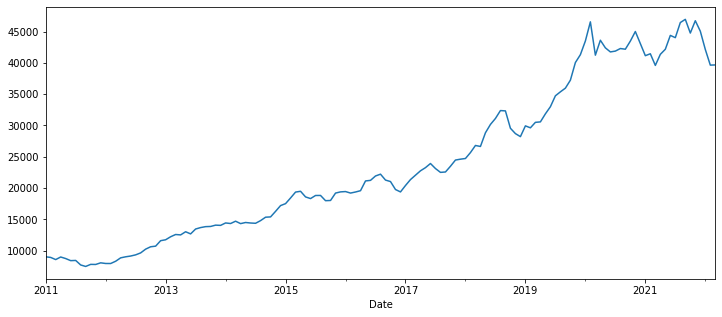

In [9]:
## want to see monthly data
ts_month = secData_au_hc1['Sector_Index_Value'].resample('M').mean()
ts_month_log=np.log(ts_month)
ts_month.plot(figsize=(12,5))   ## smoothier


In [15]:
ts_month1=ts_month.to_frame()
type(ts_month1)
ts_month1.columns

Index(['Sector_Index_Value'], dtype='object')

In [6]:
# stationarity functions

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
 

In [7]:
print(ad_test(secData_au_hc1['Sector_Index_Value']))
secData_au_hc1.shape


NameError: name 'secData_au_hc1' is not defined

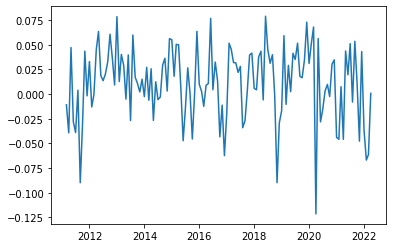

In [18]:
#taking diff

diff_log_data= ts_month_log - ts_month_log.shift()  # taking diff
plt.plot(diff_log_data)

Part 2 - this is to split the data -- try 1 for monthly data themselves

In [17]:
## split the dataset

X_train=ts_month1.iloc[:-36]
X_Valid=ts_month1.iloc[-36:]

print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_Valid.shape)
 


X_train Shape (99, 1)
X_Valid Shape (36, 1)


,Sector_Index_Value
Date,
2019-04-30,30572.181912
2019-05-31,31861.133687
2019-06-30,32997.856982
2019-07-31,34743.777535
2019-08-31,35376.820167
2019-09-30,35965.710291
2019-10-31,37241.987826
2019-11-30,40057.217305
2019-12-31,41315.627826


In [40]:
from pmdarima import auto_arima
auto_arima_model = auto_arima(ts_month1, trace=True,
suppress_warnings=True,seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2268.911, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2264.164, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2267.924, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2267.904, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2267.724, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2265.969, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2265.894, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2266.209, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2266.138, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2266.189, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2268.042, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 2.435 seconds


In [60]:
auto_arima_model.get_params().get('order')

(0, 1, 0)

<AxesSubplot:title={'center':'AU'}, xlabel='Date'>

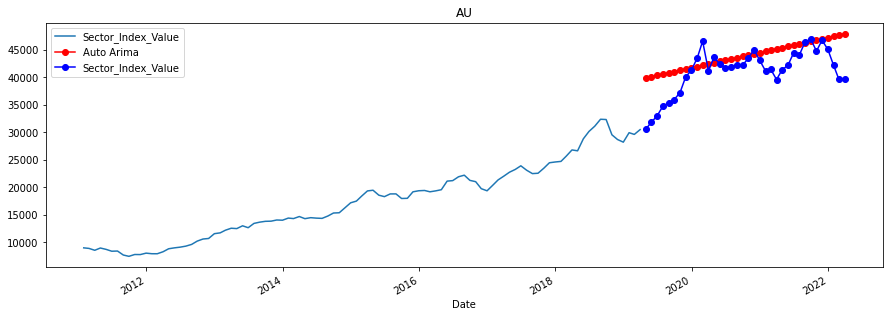

In [41]:
###### Option 2: Auto ARIMA
# make your forecasts
forcast1 = auto_arima_model.predict(36)
#forcast2 = pd.Series(forcast1,index = pd.date_range(start='2019-04-01', end='2022-03-31', freq='M'))
# Ploting the predictions

forcast2 = pd.Series(forcast1,index = X_Valid.index)
forcast2=forcast2.rename('Auto Arima')


# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(data = X_train)
chart.set_title('AU')
forcast2.plot(ax=ax, color='red', marker="o", legend=True)
X_Valid.plot(ax=ax, color='blue', marker="o", legend=True)



Running prophet

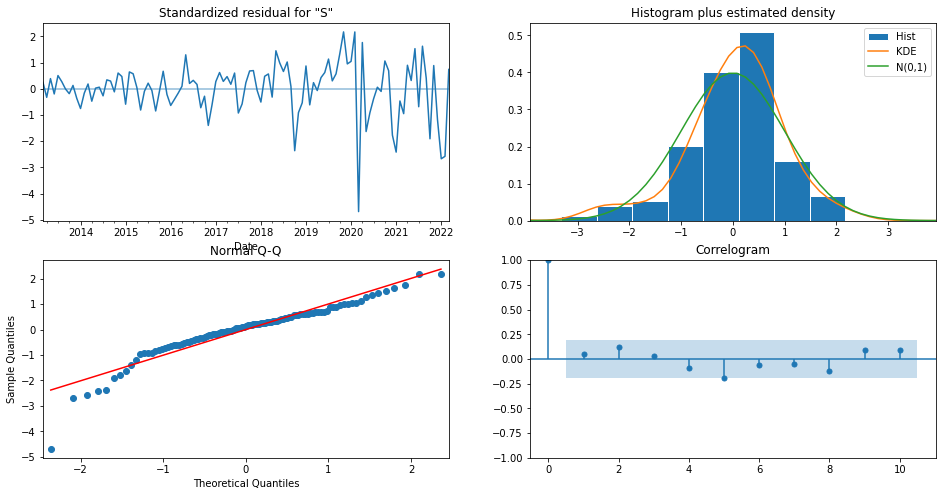

In [61]:
mod = sm.tsa.statespace.SARIMAX(ts_month1,
                        order =auto_arima_model.get_params().get('order'),
                        seasonal_order = (1,1,1,12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
                        
results = mod.fit()


mod_plot = results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [56]:
### Producing the forecasts
 

 
    
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
forecast = pred_uc.summary_frame()
    
forecast


Sector_Index_Value,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-04-30,40549.295772,1271.260274,38057.671420,43040.920123
2022-05-31,41049.305819,1797.833520,37525.616869,44572.994768
2022-06-30,41733.638314,2201.887383,37418.018344,46049.258283
2022-07-31,42056.661818,2542.520547,37073.413116,47039.910520
2022-08-31,42850.302251,2842.624389,37278.860828,48421.743675
2022-09-30,42954.568917,3113.939000,36851.360626,49057.777208
2022-10-31,42667.420728,3363.438535,36075.202335,49259.639122
2022-11-30,43752.759844,3595.667040,36705.381944,50800.137743
2022-12-31,43256.611616,3813.780821,35781.738563,50731.484670
2023-01-31,43005.902256,4020.064388,35126.720841,50885.083672
